<a href="https://colab.research.google.com/github/lucdekeijzer/bachelor_thesis/blob/master/Thesis_tries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rasterio

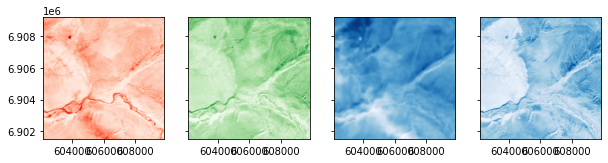

In [ ]:
import rasterio
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
from rasterio.plot import show


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)
img = rasterio.open("/content/drive/MyDrive/Bachelor Thesis/valid/valid images fire/LC08_L1TP_117016_20200926_20200926_01_RT_p00586.tif")
show((img, 4), cmap='Reds', ax=ax1)
show((img, 6), cmap='Greens', ax=ax2)
show((img, 10), cmap='Blues', ax=ax3)
show((img, 5), cmap = "Blues", ax = ax4)

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


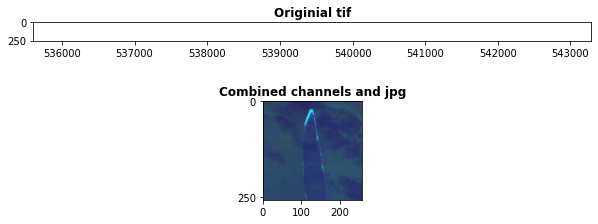

In [ ]:
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
from rasterio.plot import show


fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(10, 4), sharey=True)
img = rasterio.open("/content/drive/MyDrive/Bachelor Thesis/LC08_L1TP_175074_20200916_20200916_01_RT_v1_p00137.tif")
img2 = rasterio.open("/content/drive/MyDrive/Bachelor Thesis/test fire/LC08_L1TP_175074_20200916_20200916_01_RT_p00137.jpg")
show((img), cmap = "gray", ax = ax1, title = "Originial tif")
show((img2), ax = ax2, title = "Combined channels and jpg")

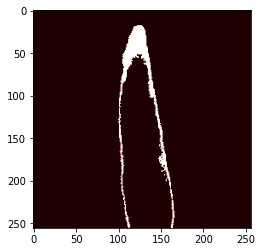

In [ ]:
plt.imshow(img.read(1), cmap='pink')
plt.show()

In [ ]:
print(img.read().shape)

(10, 256, 256)


In [ ]:
import rasterio
import numpy as np
import os
import cv2

#IMAGE = '/content/drive/MyDrive/Bachelor Thesis/LC08_L1GT_226074_20200921_20200921_01_RT_p00114.tif'
OUTPUT_DIR = '/content/drive/MyDrive/Bachelor Thesis/test fire png'
#OUTPUT_IMAGE_NAME = '00114.png'

MAX_PIXEL_VALUE = 65535 # Max. pixel value, used to normalize the image

def get_img_762bands(path):
    img = rasterio.open(path).read((4, 6, 10, 5)).transpose((1, 2, 0))    
    img = np.float32(img)/MAX_PIXEL_VALUE
    
    return img
        
for f in os.listdir("/content/drive/MyDrive/Bachelor Thesis/test fire"):
  original_img_path = os.path.join("/content/drive/MyDrive/Bachelor Thesis/test fire", f)
  img = get_img_762bands(original_img_path)
  img = np.array(img * 255, dtype=np.uint8)
  new_path = os.path.join(original_img_path[:-4] + ".jpg")
  image_name = new_path[:-4] + ".jpg"
  cv2.imwrite(os.path.join(OUTPUT_DIR, image_name), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))





IndexError: ignored

In [ ]:
get_img_762bands("/content/drive/MyDrive/Bachelor Thesis/test fire/LC08_L1TP_175074_20200916_20200916_01_RT_v1_p00109.tif")

IndexError: ignored

In [ ]:
from PIL import Image
import rasterio
import numpy as np
import os
import cv2

for f in os.listdir("/content/drive/MyDrive/Bachelor Thesis/test_try/test"):
  new_path = os.path.join("/content/drive/MyDrive/Bachelor Thesis/test_try/test_jpg", f[:-4])
  image = Image.open(os.path.join("/content/drive/MyDrive/Bachelor Thesis/test_try/test", f))
  #new_path_jpeg = os.path.join(new_path, ".jpg")
  image.save(new_path + ".jpg")

OSError: ignored

In [ ]:
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

img = get_img_762bands(IMAGE)

img = np.array(img * 255, dtype=np.uint8)
cv2.imwrite(os.path.join(OUTPUT_DIR, OUTPUT_IMAGE_NAME), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
import os
from PIL import Image

yourpath = "/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire"
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        if os.path.splitext(os.path.join(root, name))[1].lower() == ".tif":
            if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".png"):
                print ("A png file already exists for %s" % name)
            # If a PNG is *NOT* present, create one from the tiff.
            else:
              outfile = os.path.splitext(os.path.join(root, name))[0] + ".png"
              try:
                im = Image.open(os.path.join(root, name))
                print("Generating jpeg for %s" % name)
                im.thumbnail(im.size)
                im.save(outfile, "png", quality=100)
              except Exception as e:
                print (e)

/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire/LC08_L1TP_003006_20200911_20200911_01_RT_p00494.tif
Generating jpeg for LC08_L1TP_003006_20200911_20200911_01_RT_p00494.tif
/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire/LC08_L1TP_003006_20200911_20200911_01_RT_p00495.tif
Generating jpeg for LC08_L1TP_003006_20200911_20200911_01_RT_p00495.tif
/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire/LC08_L1TP_003006_20200911_20200911_01_RT_p00490.tif
Generating jpeg for LC08_L1TP_003006_20200911_20200911_01_RT_p00490.tif
/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire/LC08_L1TP_003006_20200911_20200911_01_RT_p00478.tif
Generating jpeg for LC08_L1TP_003006_20200911_20200911_01_RT_p00478.tif
/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire/LC08_L1TP_003006_20200911_20200911_01_RT_p00484.tif
Generating jpeg for LC08_L1TP_003006_20200911_20200911_01_RT_p00484.tif
/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire/LC

In [ ]:
import os
import shutil
sourcepath="/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire"
sourcefiles = os.listdir(sourcepath)
destinationpath = "/content/drive/MyDrive/Bachelor Thesis/valid_try/valid no fire png"
for file in sourcefiles:
    if file.endswith('.png'):
        shutil.move(os.path.join(sourcepath,file), os.path.join(destinationpath,file))

In [ ]:
import os

dir_name = "/content/drive/MyDrive/Bachelor Thesis/test/test"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".tif"):
        os.remove(os.path.join(dir_name, item))

In [ ]:

from matplotlib import pyplot
src = rasterio.open('/content/drive/MyDrive/Bachelor Thesis/manual_annotations_patches/LC08_L1TP_046031_20200908_20200908_01_RT_v1_p00615.tif')
pyplot.imshow(src.read(1), cmap = 'gray')
pyplot.show()


RasterioIOError: ignored

In [ ]:
import matplotlib.pyplot as plt 

img_array=plt.imread("/content/drive/MyDrive/Bachelor Thesis/train/Training images fire/LC08_L1GT_226074_20200921_20200921_01_RT_p00812.tif") 
plt.imshow(img_array)
plt.title('Display Image read using imread()') 
plt.axis('off')
plt.show()
print(img_array.shape)

UnidentifiedImageError: ignored

In [ ]:
path = '/content/drive/MyDrive/Bachelor Thesis/LC08_L1GT_226074_20200921_20200921_01_RT_v1_p00811.tif'
path_2 = "/content/drive/MyDrive/Bachelor Thesis/LC08_L1TP_025033_20200921_20200921_01_RT_v1_p00451.tif"
path_3 = "/content/drive/MyDrive/Bachelor Thesis/LC08_L1TP_025033_20200921_20200921_01_RT_v1_p00519.tif"
path_4 = "/content/drive/MyDrive/Bachelor Thesis/LC08_L1TP_177044_20200914_20200914_01_RT_v1_p00363.tif"


print(len(path)-len(path_3))
print(path[84:89])

0
00811


In [ ]:

from rasterio.plot import show
fp = r'/content/drive/MyDrive/Bachelor Thesis/train_try_png/train_try_fire_png/LC08_L1GT_226074_20200921_20200921_01_RT_p00811.png'
img = rasterio.open(fp)
show(img.read(1))




NameError: ignored

In [ ]:
from PIL import Image
from numpy import asarray
import cv2

img = Image.open("/content/drive/MyDrive/Bachelor Thesis/train_try_png/train_try_fire_png/LC08_L1TP_025033_20200921_20200921_01_RT_p00275.png")

print(img.format, img.mode, img.size)
pixels = asarray(img)
print("Data type: %s" % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 155.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

PNG RGB (256, 256)
Data type: uint8
Min: 0.000, Max: 99.000
Min: 0.000, Max: 0.639


In [ ]:
import os
from matplotlib import pyplot
import rasterio

img_list = []
img_number_list = []

for f in os.listdir("/content/drive/MyDrive/Bachelor Thesis/Train"):
  img_list.append(f[:9])
  img_number_list.append(f[45:50])

img_list.sort()  
print(img_list)
print(img_number_list)

print(f)

['LC08_L1GT', 'LC08_L1GT', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP', 'LC08_L1TP'

In [ ]:
from libtiff import TIFF

tif = TIFF.open('/content/drive/MyDrive/Bachelor Thesis/LC08_L1GT_226074_20200921_20200921_01_RT_p00021.tif') # open tiff file in read mode
# read an image in the current TIFF directory as a numpy array
image = tif.read_image()
image


In [ ]:
tf.__version__

'2.8.0'

In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")

import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import tensorflow as tf

from tensorflow.python.keras import backend as K
import keras
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras import backend as K

# from generator import *
# from models import *
# from metrics import *
# from plot_history import plot_history
import sys
import csv
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator

# Schroeder, Murphy or Kumar-Roy
MASK_ALGORITHM = 'Kumar-Roy'

IMAGES_PATH = "D:/Universiteit/Bachelor Thesis/landsat_patches"
MASKS_PATH = "D:/Universiteit/Bachelor Thesis/manual_annotations_patches"
OUTPUT_FOLDER = "D:/Universiteit/Bachelor Thesis/"
IMAGES_DATAFRAME = os.path.join(OUTPUT_FOLDER, 'images_masks.csv')

RANDOM_STATE = 42

TRAIN_RATIO = 0.4
VALIDATION_RATIO = 0.1
TEST_RATIO = 0.5

if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

masks = glob.glob(os.path.join(MASKS_PATH, '*{}*.tif'.format(MASK_ALGORITHM)))

print(os.path.join(MASKS_PATH, '*{}*.tif'.format(MASK_ALGORITHM)))
print(len(masks))

with open(IMAGES_DATAFRAME, 'w') as f:
    writer = csv.writer(f, delimiter=',')

    for mask in tqdm(masks):
        _, mask_name = os.path.split(mask)

        image_name = mask_name.replace('_{}_'.format(MASK_ALGORITHM), '_')
        writer.writerow([image_name, mask_name])


df = pd.read_csv(IMAGES_DATAFRAME, header=None, names=['images', 'masks'])
images_df = df[ ['images'] ]
masks_df = df[ ['masks'] ]

x_train, x_test, y_train, y_test = train_test_split(images_df, masks_df, test_size=1 - TRAIN_RATIO, random_state=RANDOM_STATE)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=TEST_RATIO/(TEST_RATIO + VALIDATION_RATIO), random_state=RANDOM_STATE) 

print(len(df.index), len(x_train.index), len(x_val.index), len(x_test.index))

x_train.to_csv(os.path.join(OUTPUT_FOLDER, 'images_train.csv'), index=False)
y_train.to_csv(os.path.join(OUTPUT_FOLDER, 'masks_train.csv'), index=False)
x_val.to_csv(os.path.join(OUTPUT_FOLDER, 'images_val.csv'), index=False)
y_val.to_csv(os.path.join(OUTPUT_FOLDER, 'masks_val.csv'), index=False)
x_test.to_csv(os.path.join(OUTPUT_FOLDER, 'images_test.csv'), index=False)
y_test.to_csv(os.path.join(OUTPUT_FOLDER, 'masks_test.csv'), index=False)

print('Done!')


D:/Universiteit/Bachelor Thesis/manual_annotations_patches/*Kumar-Roy*.tif
0


0it [00:00, ?it/s]


ValueError: ignored

In [ ]:
import os, csv
datapath = open('/content/drive/MyDrive/Bachelor Thesis/dataset try.csv', 'w')
folderpath = '/content/drive/MyDrive/Bachelor Thesis/train/train images no fire'

for (root,dirs,files) in os.walk(folderpath,topdown=True):
  for f in files:
    datapath.write(f)
    datapath.write('\n')
datapath.close()

In [ ]:
import pandas as pd
f = open("/content/drive/MyDrive/Bachelor Thesis/dataset try.csv", "w")
f.truncate()
f.close()
df = pd.read_csv("/content/drive/MyDrive/Bachelor Thesis/dataset try.csv")

print(df) 

     LC08_L1TP_157012_20200918_20200918_01_RT_p00967.tif
0     LC08_L1TP_157012_20200918_20200918_01_RT_p0093... 
1     LC08_L1TP_157012_20200918_20200918_01_RT_p0096... 
2     LC08_L1TP_157012_20200918_20200918_01_RT_p0093... 
3     LC08_L1TP_157012_20200918_20200918_01_RT_p0097... 
4     LC08_L1TP_157012_20200918_20200918_01_RT_p0100... 
...                                                 ... 
7147  LC08_L1TP_134039_20200901_20200901_01_RT_p0023... 
7148  LC08_L1TP_134039_20200901_20200901_01_RT_p0022... 
7149  LC08_L1TP_134039_20200901_20200901_01_RT_p0025... 
7150  LC08_L1TP_134039_20200901_20200901_01_RT_p0026... 
7151  LC08_L1TP_134039_20200901_20200901_01_RT_p0024... 

[7152 rows x 1 columns]


In [ ]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("/content/drive/MyDrive/Bachelor Thesis/train/Training images fire/LC08_L1TP_025033_20200921_20200921_01_RT_p00108.tif")
myarray = np.array(ds.GetRasterBand(1,10).ReadAsArray())

myarray

TypeError: ignored